# Tool for Statistical Testing

## Parameters

In [1]:
# Parameters for data import to be set
data_folder = "../results/perf_results_g0"
data_file = "../results/all_results_g0.csv"

test_pairs = [
    ["0_comp", "alpha_beta"],
    ["alpha_beta", "transposition_table"],
    ["transposition_table", "transposition_table_opt_all"],
    ["transposition_table", "transposition_table_opt_1"],
    ["transposition_table", "transposition_table_opt_2"],
    ["transposition_table", "transposition_table_opt_3"],
]

test_value = ["cycles", "time"]

# Parameters for the tests to be set
alternative = "greater"
alpha = 0.05

## Importing the Data

It is assumed that the data are given in **csv-format**.
Columns are separeted by a **semicolon** ```;``` and the first row contains the **names of the variables**. Furthermore it is assumed that for decimal numbers the **decimal point** ```.``` is used.

The following example is based on ```Daten.csv``` (see TUWEL), where the results of **A** and **B** are given in the same file.
It is assumed, that this file lies in the subfolder ```data``` of this notebook.

In [2]:
# Importing the data
from data_processing import load_all_results
import pandas as pd

load_all_results(data_folder, data_file)
all_data = pd.read_csv(data_file)
all_data = all_data[["algorithm", "branch-misses","branches","cycles","depth","instance","instructions","time"]]
all_data["algorithm"] = all_data["algorithm"].replace({"comp": "0_comp"})

In [3]:
all_data.head()

algorithm  branch-misses      branches        cycles  \
0  transposition_table_opt_3   1.079039e+08  4.267404e+09  1.312706e+10   
1  transposition_table_opt_3   1.272508e+09  5.507174e+10  1.674238e+11   
2  transposition_table_opt_1   6.139813e+06  2.306997e+08  6.339644e+08   
3        transposition_table   1.010880e+08  4.536912e+09  1.213109e+10   
4                 alpha_beta   1.236493e+08  5.163768e+09  1.411102e+10   

   depth instance  instructions       time  
0      3       x5  2.466981e+10   4.095699  
1      4       x4  3.202681e+11  51.422120  
2      2       x9  1.252986e+09   0.208725  
3      3       x8  2.481745e+10   3.590559  
4      3       x5  2.844768e+10   4.183875

In [4]:
all_data.groupby(["algorithm"]).count()

branch-misses  branches  cycles  depth  instance  \
algorithm                                                                       
0_comp                                  18        18      18     18        18   
alpha_beta                              36        36      36     36        36   
transposition_table                     36        36      36     36        36   
transposition_table_opt_1               36        36      36     36        36   
transposition_table_opt_2               36        36      36     36        36   
transposition_table_opt_3               36        36      36     36        36   
transposition_table_opt_all             36        36      36     36        36   

                             instructions  time  
algorithm                                        
0_comp                                 18    18  
alpha_beta                             36    36  
transposition_table                    36    36  
transposition_table_opt_1              36    36  
transposition_table_opt_2              36    36  
transposition_table_opt_3              36    36  
transposition_table_opt_all            36    36

## Preliminary Code

The following packages need to be imported:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# scipy contains statistical tests and other useful content
import scipy.stats
from scipy.stats import norm

In [6]:
def print_decision(pvalue, alpha):
    print("Test Result:")
    print("p-value = %.4f" % (pvalue))
    if pvalue < alpha:
        print("H0 can be rejected on a level of significance of " + str(alpha) + ".")
    else:
        print("H0 cannot be rejected on a level of significance of " + str(alpha) + ".")
        
def compute_pvalue(pvalue, diff, alternative):
    if alternative == "greater":
        if diff > 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    elif alternative == "less":
        if diff < 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    return pvalue

def plot_hist(data, group):
    # Plot a histogram
    plt.hist(data, density = True, alpha = 0.5)

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the probability density function
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 201)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, "black")
    title = "Fit results of " + group + ": mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title, pad=20)

    plt.show()

## Visualization of the Results

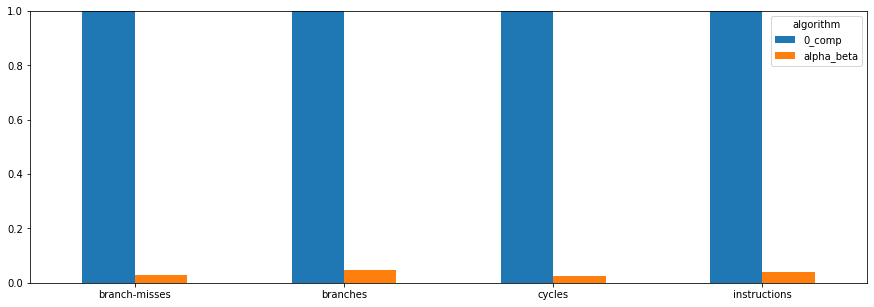

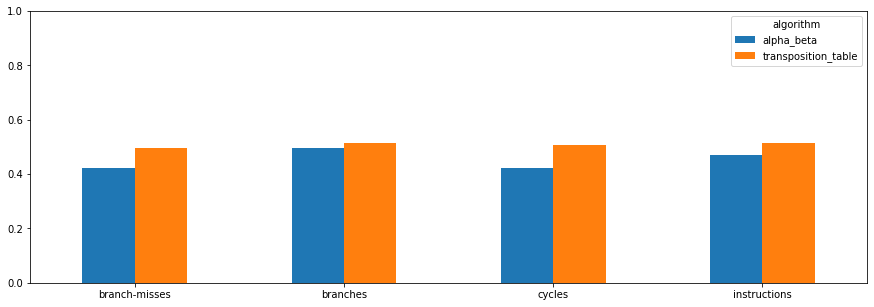

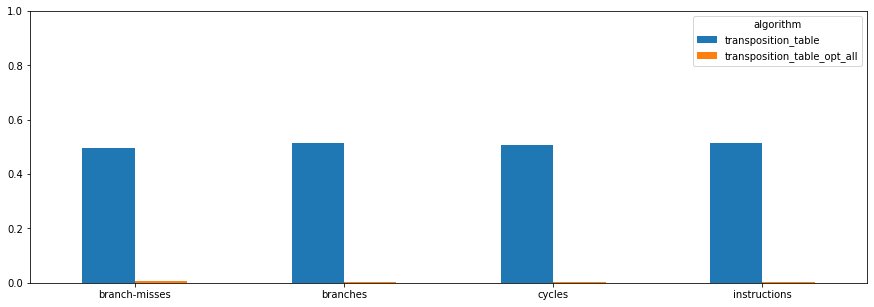

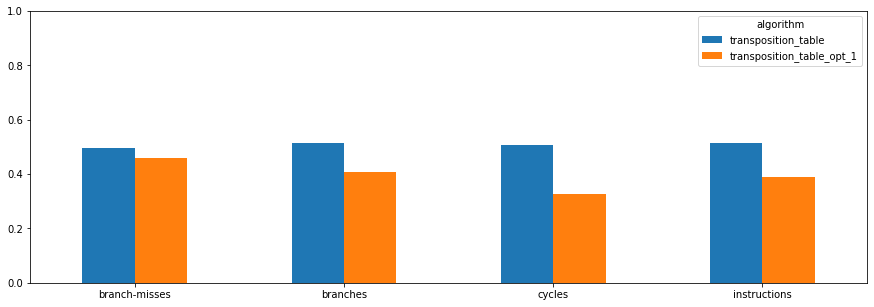

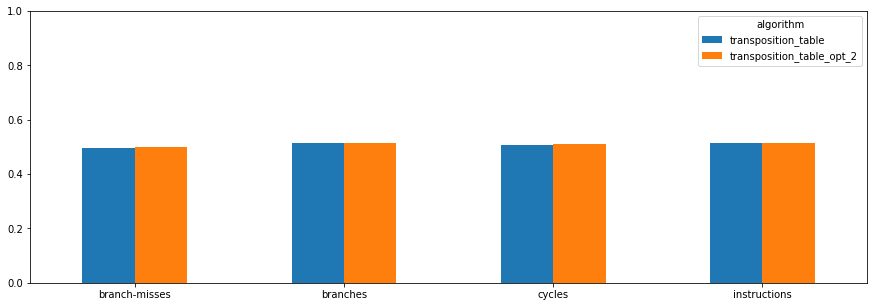

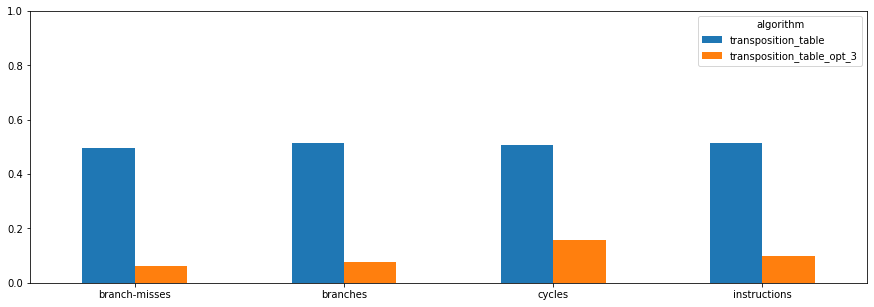

In [7]:
all_values = ["branch-misses","branches","cycles","instructions"]

grouped = all_data.groupby(["depth", "instance"]).agg({value: ['min', 'max'] for value in all_values})

for pair in test_pairs:
    # normalize all results
    all_depths = set(all_data[all_data["algorithm"] == pair[0]]["depth"]).intersection(all_data[all_data["algorithm"] == pair[1]]["depth"])    
    normed_data = all_data[all_data["algorithm"].isin(pair) & (all_data["depth"].isin(all_depths))].copy()
            
    for value in all_values:
        normed_data[value] = normed_data.apply(lambda row: (row[value] - grouped.loc[(row["depth"], row["instance"])][value]["min"]) / (grouped.loc[(row["depth"], row["instance"])][value]["max"] - grouped.loc[(row["depth"], row["instance"])][value]["min"]), axis=1)
        
    
    normed_data.groupby("algorithm").mean()[all_values].T.plot.bar(rot=0, figsize=(15,5), ylim=(0,1))
    plt.show()


## Tests for paired samples

### Visualisation of the distribution of the difference

We check, whether the difference ```data_A - data_B``` is (approximately) normally distributed.
This can be done by plotting a **histogram**.
Furthermore we plot the **density of an estimated normal distribution**.
If the curve approximately follows the histogram, then normal distribution can be assumed.

Test for 0_comp against alpha_beta using cycles


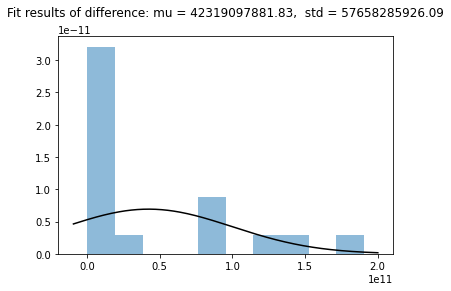

Test for 0_comp against alpha_beta using time


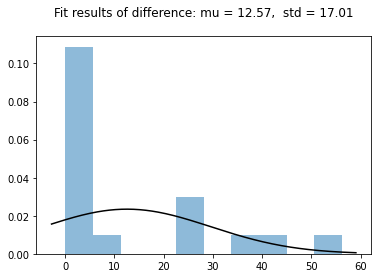

---------------------------------
Test for alpha_beta against transposition_table using cycles


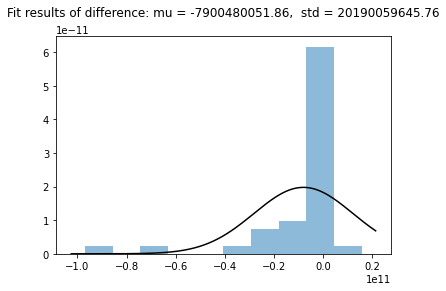

Test for alpha_beta against transposition_table using time


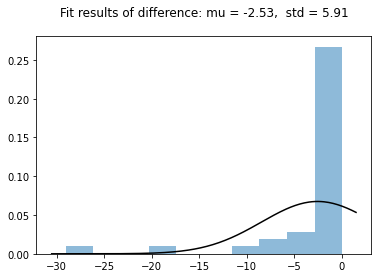

---------------------------------
Test for transposition_table against transposition_table_opt_all using cycles


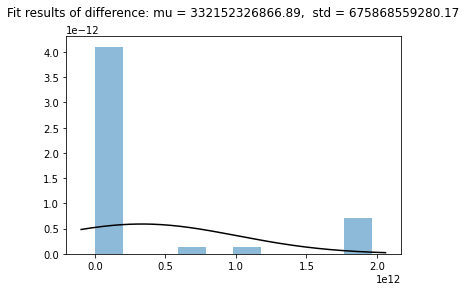

Test for transposition_table against transposition_table_opt_all using time


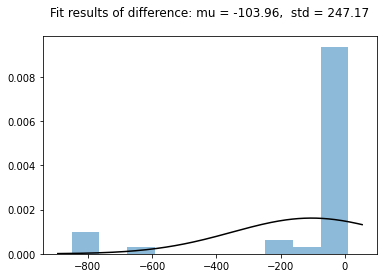

---------------------------------
Test for transposition_table against transposition_table_opt_1 using cycles


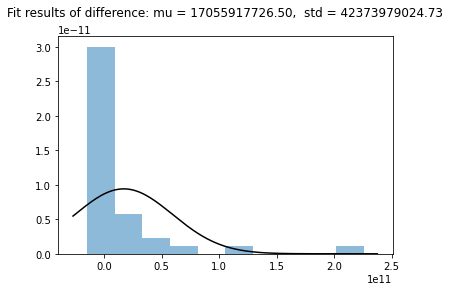

Test for transposition_table against transposition_table_opt_1 using time


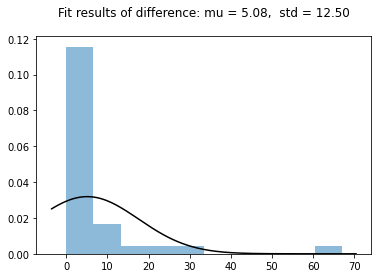

---------------------------------
Test for transposition_table against transposition_table_opt_2 using cycles


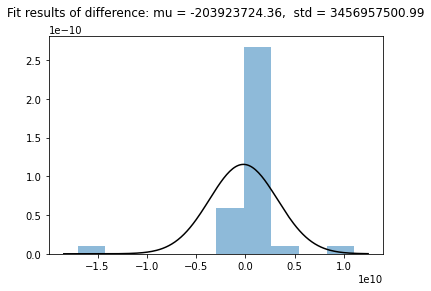

Test for transposition_table against transposition_table_opt_2 using time


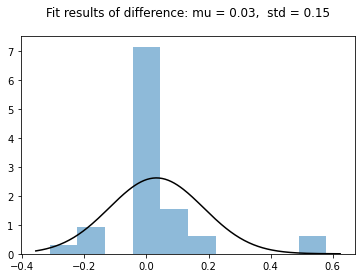

---------------------------------
Test for transposition_table against transposition_table_opt_3 using cycles


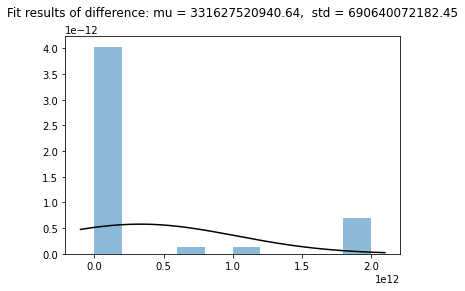

Test for transposition_table against transposition_table_opt_3 using time


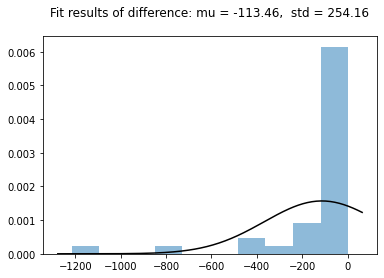

---------------------------------


In [8]:
for test_pair in test_pairs:
    data_X = all_data[all_data["algorithm"] == test_pair[0]]
    data_Y = all_data[all_data["algorithm"] == test_pair[1]]

    matched_df = pd.merge(data_X, data_Y,  how='inner', left_on=['depth','instance'], right_on = ['depth','instance'])
    for value in test_value:
        print("Test for {} against {} using {}".format(test_pair[0], test_pair[1], value))
        values_x = matched_df[value+"_x"]
        values_y = matched_df[value+"_y"]
        plot_hist(values_x - values_y, "difference")
    print("---------------------------------")

### Wilcoxon Test for two paired samples

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [9]:
for test_pair in test_pairs:
    data_X = all_data[all_data["algorithm"] == test_pair[0]]
    data_Y = all_data[all_data["algorithm"] == test_pair[1]]

    matched_df = pd.merge(data_X, data_Y,  how='inner', left_on=['depth','instance'], right_on = ['depth','instance'])
    for value in test_value:
        print("Test for {} against {} using {}".format(test_pair[0], test_pair[1], value))
        values_x = matched_df[value+"_x"]
        values_y = matched_df[value+"_y"]
        # Apply the statistical test
        res = scipy.stats.wilcoxon(values_x, values_y, alternative = alternative)

        # Print results
        print_decision(res.pvalue, alpha)
        print()

Test for 0_comp against alpha_beta using cycles
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.

Test for 0_comp against alpha_beta using time
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.

Test for alpha_beta against transposition_table using cycles
Test Result:
p-value = 0.9861
H0 cannot be rejected on a level of significance of 0.05.

Test for alpha_beta against transposition_table using time
Test Result:
p-value = 0.9997
H0 cannot be rejected on a level of significance of 0.05.

Test for transposition_table against transposition_table_opt_all using cycles
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.

Test for transposition_table against transposition_table_opt_all using time
Test Result:
p-value = 0.6585
H0 cannot be rejected on a level of significance of 0.05.

Test for transposition_table against transposition_table_opt_1 using cycles
Test Result:
p-value = 0.0000
H